In [1]:
import re
import pandas as pd 
import string
from string import punctuation
from collections import Counter
import statistics

import spacy
import pt_core_news_sm
nlp = pt_core_news_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import nltk;
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azvma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Importando o arquivo Excel com os dados

In [2]:
df = pd.read_excel('./data/DoisIrmaos_Revisado.xlsx',
                 error_bad_lines=False,
                  usecols = ['ID', 'Personagem','Texto', 'Tipo', 'TamanhoFrase'])
df.shape

(4790, 5)

In [3]:
df.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase
0,1,Narrador,Zana teve de deixar tudo: o bairro portuário d...,Narração,406
1,2,Narrador,"Perto do alpendre, o cheiro das açucenas-branc...",Narração,84
2,3,Narrador,"Então ela sentava no chão, rezava sozinha e ch...",Narração,79
3,4,Narrador,"Antes de abandonar a casa, Zana via o vulto do...",Narração,163
4,5,Narrador,Durante o dia eu a ouvia repetir as palavras d...,Narração,59


### 1.1 Verificando a existência de nulos

In [4]:
df.isnull().sum()

ID              0
Personagem      0
Texto           0
Tipo            0
TamanhoFrase    0
dtype: int64

## 2. Observando frequências e criando uma nuvem de palavras

### 2.1 Frequências de Palavras

### As tags seguintes fazem uma análise de frequência de palavras para os três personagens centrais deste romance: Flora e os gêmeos Paulo e Pedro. 'Senhor', 'senhora'e 'Mamãe' devem ser consideradas as três maiores frequências na lista de Flora. A palavra 'perguntou' deriva de finais de frases onde o Narrador após alguma fala do tipo pergunta da personagem termina com essa afirmação.

In [5]:
StopWOrds = nltk.corpus.stopwords.words('portuguese')
StopWOrds.append('...')

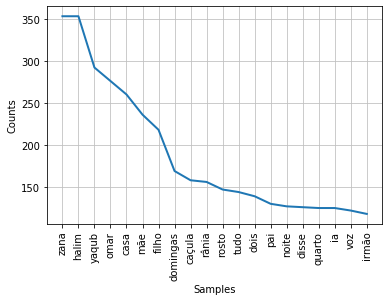

Total de palavras na obra, sem as stopwords:  36962


In [6]:
falas = df.Texto.tolist() 

falas = " ".join(s for s in falas )
sentencas = sent_tokenize(falas)
palavras = word_tokenize(falas.lower())
stopwords = set(StopWOrds + list(punctuation))
#stopwords = set(stopwords.words('portuguese') + list(punctuation))
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_sem_stopwords)
freq.plot(20, cumulative=False)
print("Total de palavras na obra, sem as stopwords: ", len(palavras_sem_stopwords))

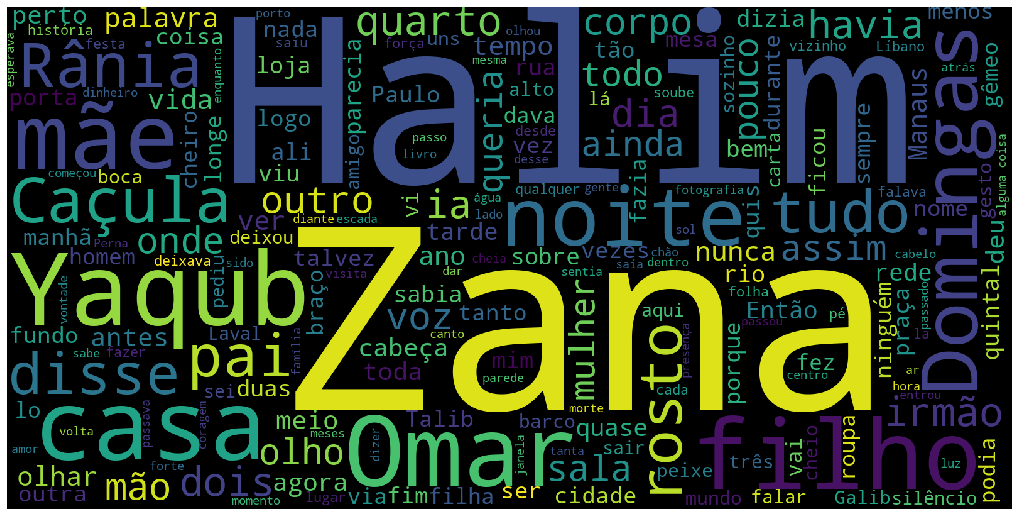

In [7]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(falas)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

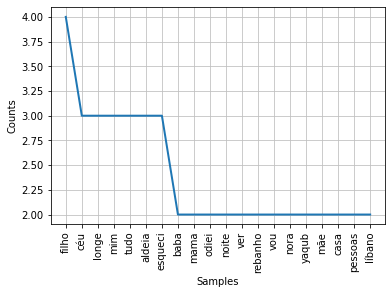

Total de palavras nas falas de Yaqub:  239


In [8]:
falaYaqub = df[df.Personagem=='Yaqub'].Texto.tolist() 

falaYaqub = " ".join(s for s in falaYaqub )
sentencas = sent_tokenize(falaYaqub)
palavras = word_tokenize(falaYaqub.lower())
stopwords = set(StopWOrds + list(punctuation))
#stopwords = set(stopwords.words('portuguese') + list(punctuation))
palavras_yaqub = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_yaqub)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Yaqub: ", len(palavras_yaqub))

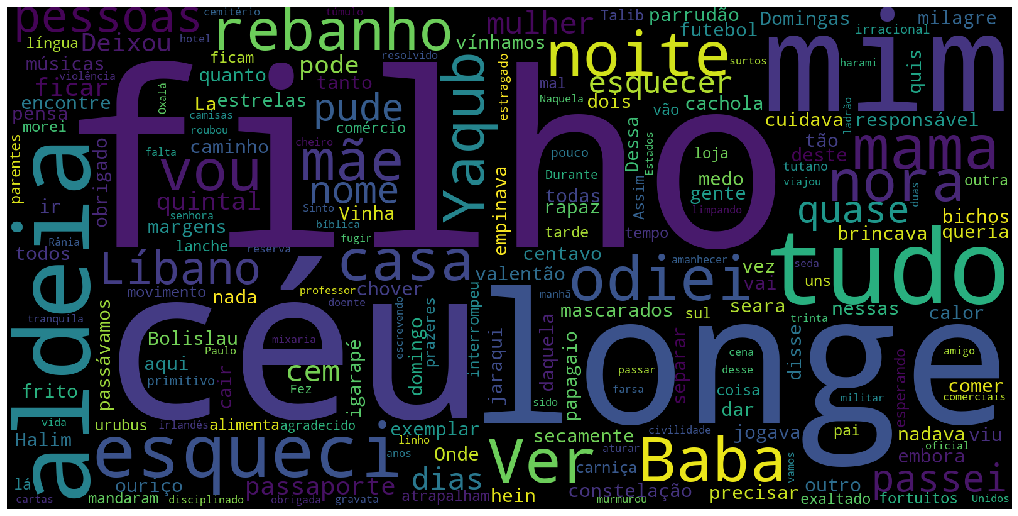

In [9]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(falaYaqub)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

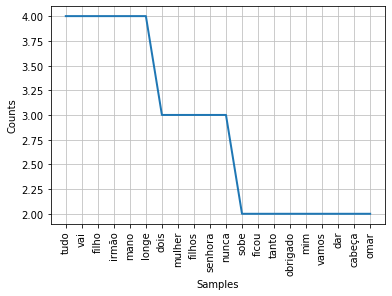

Total de palavras nas falas de Omar:  257


In [10]:
falaOmar = df[df.Personagem=='Omar'].Texto.tolist() 
falaOmar = " ".join(s for s in falaOmar )
sentencas = sent_tokenize(falaOmar)
palavras = word_tokenize(falaOmar.lower())
stopwords = set(StopWOrds + list(punctuation))
palavras_omar = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_omar)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Omar: ", len(palavras_omar))

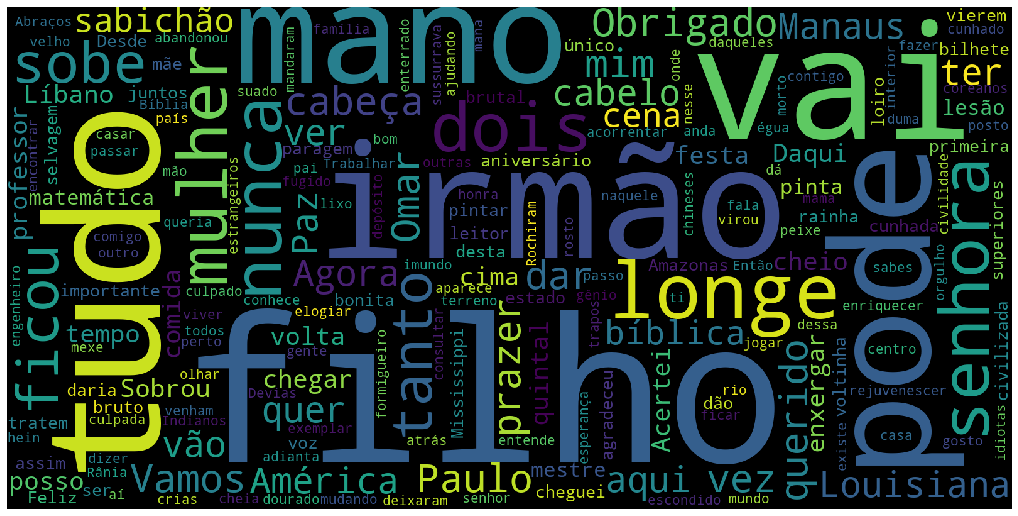

In [11]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black",width=1600, height=800).generate(falaOmar)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

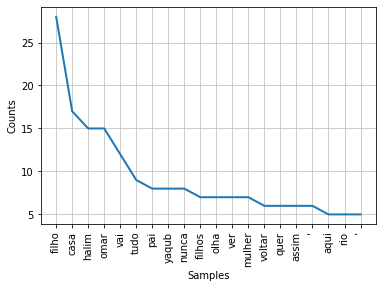

Total de palavras nas falas de Paulo:  897


In [12]:
falaZana = df[df.Personagem=='Zana'].Texto.tolist() 
falaZana = " ".join(s for s in falaZana )
sentencas = sent_tokenize(falaZana)
palavras = word_tokenize(falaZana.lower())
stopwords = set(StopWOrds + list(punctuation))
palavras_zana = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_zana)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Paulo: ", len(palavras_zana))

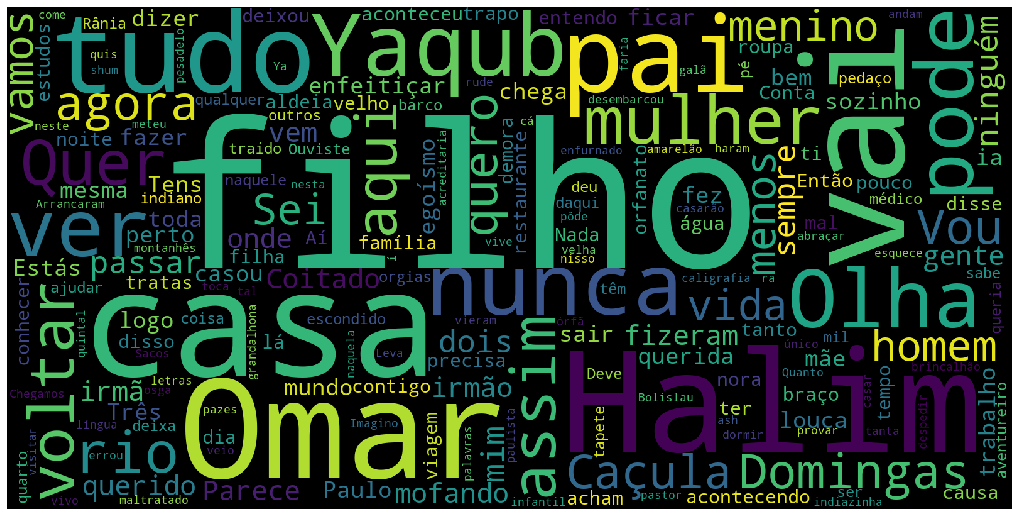

In [13]:
wordcloud = WordCloud(stopwords=stopwords,background_color="black", width=1600, height=800).generate(falaZana) 
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

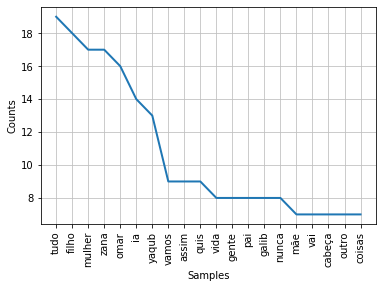

Total de palavras nas falas de Natividade:  1531


In [14]:
falaHalim = df[df.Personagem=='Halim'].Texto.tolist() 
falaHalim = " ".join(s for s in falaHalim )
sentencas = sent_tokenize(falaHalim)
palavras = word_tokenize(falaHalim.lower())
stopwords = set(StopWOrds + list(punctuation))
palavras_halim = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_halim)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Natividade: ", len(palavras_halim))

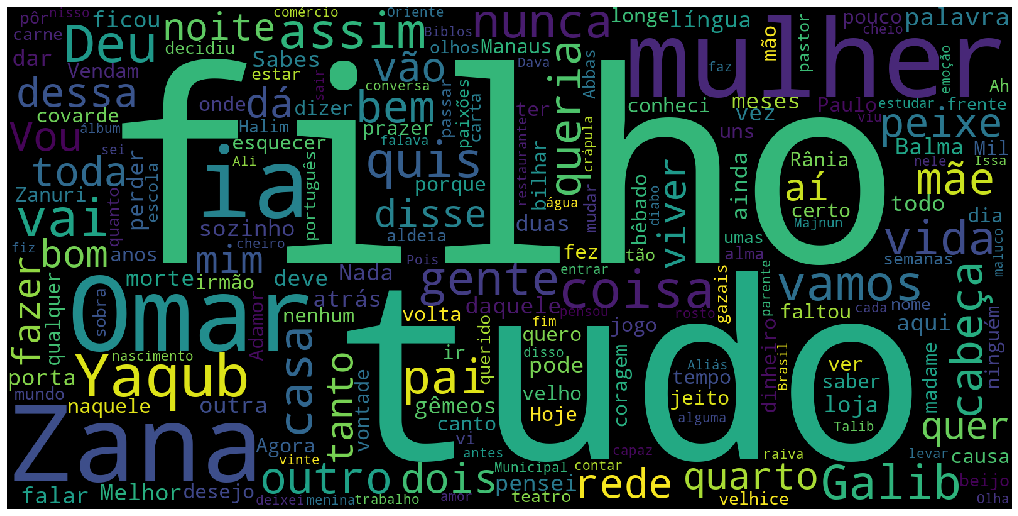

In [15]:
wordcloud = WordCloud(stopwords=stopwords,background_color="black", width=1600, height=800).generate(falaHalim)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

## Histograma das Falas

No handles with labels found to put in legend.


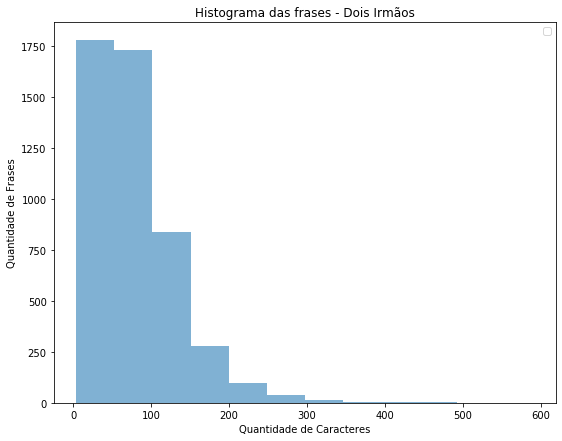

In [16]:
df['TamanhoTexto'] = df['Texto'].apply(len)

x1 =list(df['TamanhoTexto'])
colors = ['#80b1d3']
         
plt.figure(figsize=(9,7))
plt.hist([x1], bins = int(180/15), normed=False, color = colors)

plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Frases')
plt.title ('Histograma das frases - Dois Irmãos')
plt.legend();

In [17]:
statistics.mean(df['TamanhoTexto'])

78.55594989561587

## Elementos Ortográficos

In [20]:
doc = nlp(palavras_sem_stopwords)
elementos = [(token.orth_, token.pos_) for token in doc]
len(elementos)

TypeError: Argument 'string' has incorrect type (expected str, got list)

In [19]:
df_falas = pd.DataFrame(elementos, columns=['Palavra', 'Tipo'])

NameError: name 'elementos' is not defined

In [ ]:
df_falas.head(200)

In [ ]:
df_freq = pd.DataFrame(df_falas['Tipo'].value_counts()).reset_index().sort_values('index').sort_values('Tipo', ascending=False)
df_freq.columns = ['Tipo', 'Quant']
df_freq

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_freq, x='Tipo', y='Quant', palette='GnBu_d')
plt.title('Distribuição dos Elementos Ortográficos - Esaú e Jacó')
plt.show()